# Assignment #0 - Data and Visualization

<font color="red"> <b> Due: Sep 25 (Friday) 11:00 pm </b> </font>


<font color="blue"> Sreekar Nedunuri, St ID: 801167891 </font>

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run fine without any error. 
**You don't need to run any ML algorithm.** 
This assignment only asks reading, visualizing, and writing your observations from it.

**Note: this is a WRITING assignment. Proper writing is REQUIRED. Comments are not considered as writing.** 


Points | | Description
--|--|:--
10 | Introduction  
80 | Data and Visualization | 
 | 10| Introduction of data for regression & source (cite related articles)
 | 5| Reading the data 
 | 5| Preprocessing of the data 
 | 10| Visualization of the data 
 | 10| Preliminary observation 
 | 10| Introduction of data for Classification & source (cite related articles)
 | 5| Reading the data 
 | 5| Preprocessing of the data 
 | 10| Visualization of the data 
 | 10| Preliminary observation 
5 | Conclusions 
5 | References 



# II. Data & Visualization

## Introduction of Data


#### This is Electrical Grid Stability Simulated Data Set from UCI Machine Learning Repository where we identify if data is stable or unstable based on few attirbutes like power consumption and user
####  Attribute Information:

#### 11 predictive attributes, 1 non-predictive(p1), 2 goal fields:
#### 1. tau[x]: reaction time of participant (real from the range [0.5,10]s). Tau1 - the value for electricity producer.
#### 2. p[x]: nominal power consumed(negative)/produced(positive)(real). For consumers from the range [-0.5,-2]s^-2; p1 = abs(p2 + p3 + p4)
#### 3. g[x]: coefficient (gamma) proportional to price elasticity (real from the range [0.05,1]s^-1). g1 - the value for electricity producer.
#### 4. stab: the maximal real part of the characteristic equation root (if positive - the system is linearly unstable)(real)
#### 5. stabf: the stability label of the system (categorical: stable/unstable)

#### The local stability analysis of the 4-node star system (electricity producer is in the center) implementing Decentral Smart Grid Control concept.


#### Source: https://archive.ics.uci.edu/ml/datasets/Electrical+Grid+Stability+Simulated+Data+

In [1]:
# Importing necessary libraries for assignment
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [47]:
# Reading csv data using pandas

energyy = pd.read_csv("Data_for_UCI_named.csv")

In [52]:
# Viewing the data

energyy

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0.023892,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,-0.031810,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0.037789,unstable


In [53]:
# Checking if the data has non null values
energyy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


### We have read the data from .csv file and checked for nulls
### All are non null values hence we can proceed with next step

# Pre Processing of data

### In this step we check how the data is, that is if it consists of any null values and we check the data of the columns if they have the same data type to maintain consistency, converting classification data into numerical if any.

### We can drop the stabf attribute since it object and is classification categorical data which is not needed for this regression data/




In [54]:
energy = energyy.drop('stabf',axis=1)
energy

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0.023892
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,-0.031810
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0.037789


In [17]:
## No null values are present in data

In [11]:
# Checking the minimum and maximum value for each attribute so as to see if data has to be normalized or not
energy.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


## Normalization of data
### Here, we check how distributed are the minimum and maximum values separated, if they are separated apart from 0 and 1, we need to normalize the attribute, I used Min Max method of normalization. 

### First i described the data and then applied min max to the attributes

### We will use sklearn inbuilt class MinMaxScaler to normalize and then convert into data frame since MinMax return numpy nd array.

In [22]:
## Since minimum and max values are separated, we need to normalize it to stabilize.
from sklearn.preprocessing import MinMaxScaler
energy_numerical = energy[['tau1','tau2','tau3','tau4','p1','p2','p3','p4','g1','g2','g3','g4']]
norm = MinMaxScaler().fit(energy_numerical)
energy_norm=norm.transform(energy_numerical)
energy_norm

array([[0.258801  , 0.2715607 , 0.82961551, ..., 0.85222919, 0.88153113,
        0.95589431],
       [0.92679272, 0.46342358, 0.26811698, ..., 0.85521477, 0.539078  ,
        0.77032342],
       [0.89179939, 0.87879525, 0.26800518, ..., 0.75443962, 0.83100004,
        0.06297995],
       ...,
       [0.19615798, 0.24652253, 0.87123881, ..., 0.98585209, 0.10446344,
        0.1010163 ],
       [0.9612621 , 0.36782825, 0.23753691, ..., 0.56585897, 0.88329277,
        0.8088868 ],
       [0.63479724, 0.66124738, 0.40520519, ..., 0.47941064, 0.34603379,
        0.93967879]])

In [24]:
## Converting into DataFrame and viewing the data
energy_df = pd.DataFrame(energy_norm)
energy_df.columns = energy_numerical.columns
energy_df.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.499986,0.500001,0.499988,0.500004,0.506188,0.499999,0.500006,0.499984,0.500028,0.500002,0.499982,0.500022
std,0.288730,0.288699,0.288730,0.288721,0.175663,0.288732,0.288715,0.288709,0.288712,0.288722,0.288711,0.288719
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.249940,0.250008,0.250007,0.249972,0.382012,0.250029,0.249968,0.249994,0.250032,0.250027,0.249977,0.249990
50%,0.499987,0.499999,0.499985,0.499976,0.506428,0.500022,0.500023,0.499979,0.500038,0.500005,0.499997,0.500024
75%,0.749988,0.749998,0.750017,0.750014,0.630532,0.750051,0.749998,0.749957,0.749979,0.750020,0.749937,0.749977
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## II.2. Visualization & Observation

### In this step we try to extract valuable insightful data from the plots

In [37]:
energy.p1.sum()

37499.9995793617

In [39]:
energy.columns

Index(['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2',
       'g3', 'g4', 'stab'],
      dtype='object')

In [42]:
ev = {}
for cols in energy.columns:
    ev[cols] = energy[cols].sum()
col = list(ev.keys())
sum = list(ev.values())

en = pd.DataFrame.from_dict({'Attributes':col,'sum':sum})
en

,Attributes,sum
0,tau1,52499.999306
1,tau2,52500.010220
2,tau3,52500.035242
3,tau4,52499.970644
4,p1,37499.999579
5,p2,-12500.004574
6,p3,-12499.997444
7,p4,-12499.997560
8,g1,5249.997888
9,g2,5250.002584


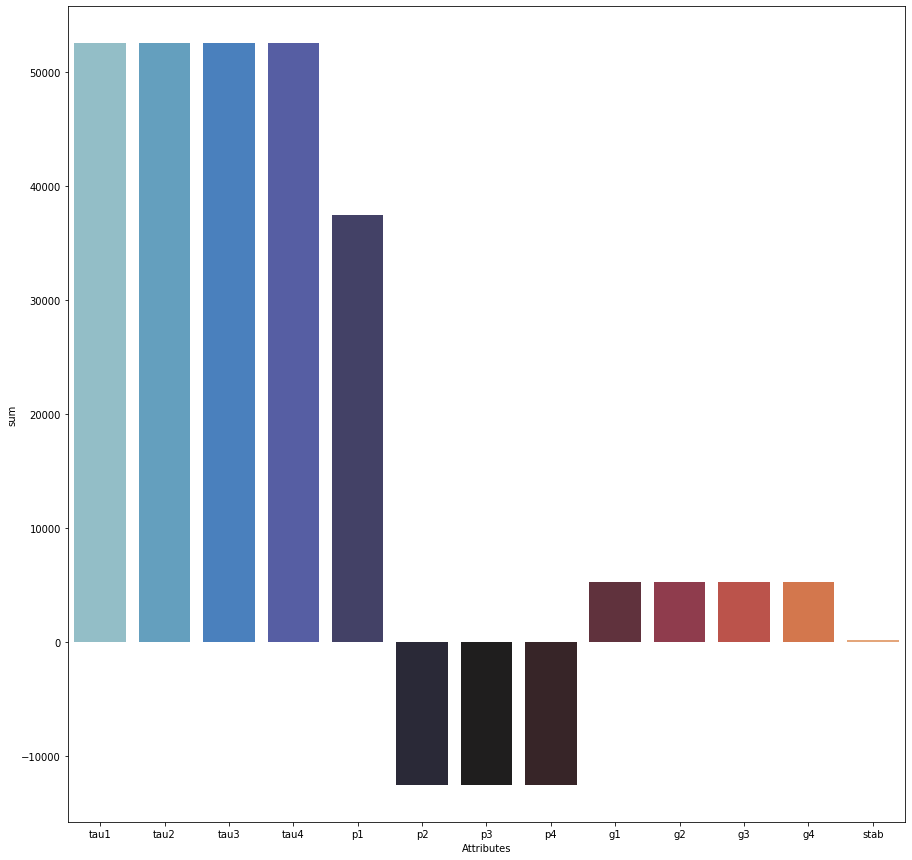

In [45]:
b
sns.barplot(x='Attributes',y='sum',data=en,palette='icefire')
plt.show()

## Observation of this plot
### As you can see energy is negatively consumed for p2,p3 and p4, as per data logic we are adding p2,p3,p4 to get p1. These are the sum of the attributes

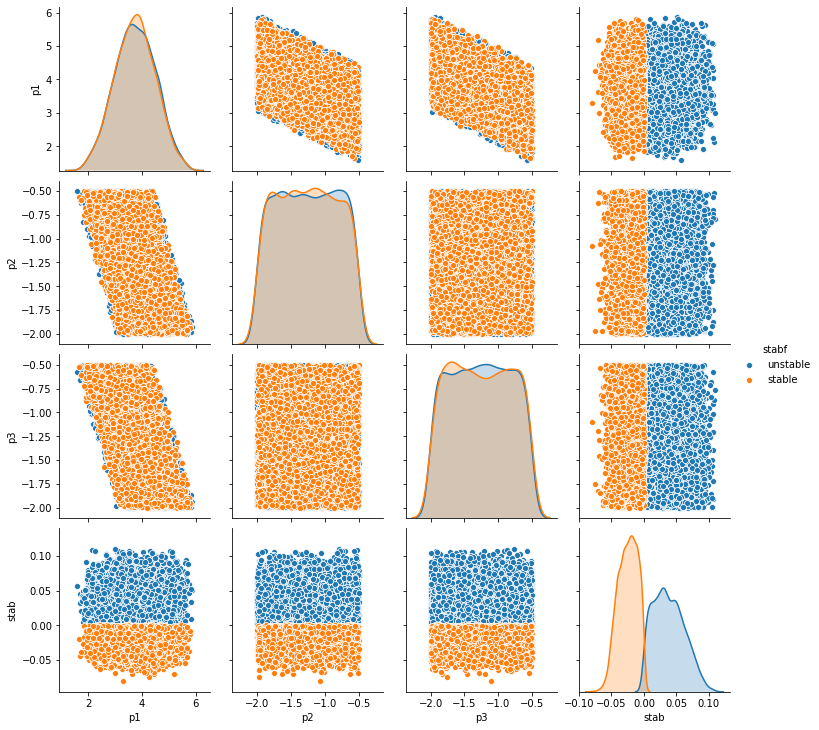

In [56]:
import seaborn as sns
sns.pairplot(energyy[['p1','p2','p3','stab','stabf']],diag_kind='kde',hue='stabf')

## Observation of this plot
### In these plots we can observe how stable and unstable data are correlated, why consumption of power in negatively impacted.

# III. Conclusions

### The challenge what I faced is trying to understand how tough it is to plot continous data and extract meaningful data from it, when data especially tightly bound with lower interval values will not have much to depict, digging deeper into it has been proven beneficial.

### Understood Various plotting techniques.

# References


### Data taken from UCI Machine Learning Repository, https://archive.ics.uci.edu/ml/datasets/Electrical+Grid+Stability+Simulated+Data+

### The analysis is performed for different sets of input values using the methodology similar to that described in [SchÃ¤fer, Benjamin, et al. 'Taming instabilities in power grid networks by decentralized control.' The European Physical Journal Special Topics 225.3 (2016): 569-582.]. Several input values are kept the same: averaging time: 2 s; coupling strength: 8 s^-2; damping: 0.1 s^-1

### Understood plotting using pandas at : https://matplotlib.org/

### https://numpy.org/

### https://pandas.pydata.org/docs/

### https://stackoverflow.com/

### https://seaborn.pydata.org/